In [18]:
import tensorflow_datasets as tfds

In [19]:
# Creating a model
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# Custom activation function
from keras.layers import Activation
from keras import backend as k
from keras.utils.generic_utils import get_custom_objects
"""
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
"""

#r = tf.cond(tf.less(x, y), f1, f2)


@tf.function
def custom_activation(x):
  #def f1(): return k.tf.add(0.001,k.tf.add(x,7.5))
  def f3(): return k.tf.add(0.134,k.tf.multiply(tf.cast(x, tf.float32),0.029))
  def f5(): return k.tf.add(0.5,k.tf.multiply(tf.cast(x, tf.float32),0.231))
  def f7(): return k.tf.add(0.938,k.tf.multiply(tf.cast(x, tf.float32),0.011))
  def f9(): return k.tf.ones([1,1],tf.float32)


  def f6(): return k.tf.where(k.tf.logical_and(k.tf.greater(tf.cast(x, tf.float32), 2), tf.less(tf.cast(x, tf.float32), 6)),x=f7(),y=f9())
  def f4(): return k.tf.where(k.tf.logical_and(k.tf.greater(tf.cast(x, tf.float32), -2), tf.less(tf.cast(x, tf.float32), 2)),x=f5(),y=f6())
  def f2(): return k.tf.where(k.tf.logical_and(k.tf.greater(tf.cast(x, tf.float32), -6), tf.less(tf.cast(x, tf.float32), -2)),x=f3(),y=f4())
  
  
  r = tf.where(
         condition=(k.tf.logical_and(k.tf.greater(tf.cast(x, tf.float32), -10), tf.less(tf.cast(x, tf.float32), -6))),
         x=k.tf.add(0.008,k.tf.multiply(tf.cast(x, tf.float32),0.001)),
         y=f2()
     )

  return r

# 0
# 0.002 + 0.001(x+6.25) -> 0.00825+0.001x
# 0.023 + 0.007(x+3.75) -> 0.4925+0.007x
# 0.245 + 0.076(x+1.125) -> 0.3305+0.076x
# 0.755 + 0.207(x-1.125) -> 0.5222-0.207x
# 0.977 + 0.099(x-3.75) -> 0.6058-0.099x
# 0.998 + 0.012(x-6.25) -> 0.923-0.012x
# 1.0 + 0.001(x-8.75) -> 0.99125-0.001x

# k.tf.zeros([1,1], tf.float32)
"""
  r = K.tf.where(
         condition=(K.tf.logical_and(K.tf.greater(x, -10), K.tf.less(x, -5))),
         x=K.tf.add(0.001,K.tf.add(x,7.5)),
         y=f2()
     )
"""
#tf.logical_or((tf.logical_and(tf.greater(x, -10), tf.less(x, -5))), (tf.logical_and(tf.greater(x, -5), tf.less(x, 5)) )


    #def f1(): return tf.add(0.5,tf.multi(0.099,x))

    # return tf.where(
    #     condition=tf.logical_or((tf.logical_and(tf.greater(x, -10), tf.less(x, -5))), (tf.logical_and(tf.greater(x, -5), tf.less(x, 5)) )),
    #     x=tf.add(0.001,tf.add(x,7.5)),
    #     y=tf.add(0.5,tf.multiply(0.099,x))
    # )

"""
  x =tf.dtypes.cast(x, tf.int32)
  if (x > -10 & x < -5):
    y = 0.001 + 0.015*(x+7.5);
  if (x > -5 & x < 5):
    y = 0.5 + 0.099*x;
  if x > 5:
    y = 0.999;
  return y
"""
"""
loss = tf.where(
        condition=tf.logical_or((tf.logical_and(tf.greater(y_true, 0.0), tf.greater(y_pred, y_true))), (tf.logical_and(tf.less(y_true, 0.0), tf.less(y_pred, y_true)))),
        x=loss * penalty / 5,
        y=loss * penalty / 10
    )
"""
"""
# working
# tf.where(tf.less(x, 0), tf.add(0.5,tf.multiply(0.099,x)) ,tf.add(0.5,tf.multiply(0.099,x)))
"""
# tf.where(tf.less(x, 0), true_fn=lambda: tf.add(0.5,tf.multiply(0.099,x)), false_fn=lambda: tf.add(0.5,tf.multiply(0.099,x))) 
# tf.cond(tf.logical_and(tf.less(x,-10),tf.greater(x,-5))): 
"""
    if x > -5 and x < 5:
        return tf.add(0.5,tf.multi(0.099,x)) 
    if x > 5:
        return 0.999
"""
get_custom_objects().update({'custom_activation': Activation(custom_activation)})
"""
# Usage
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation(custom_activation, name='SpecialActivation'))
print(model.summary())
"""

"\n# Usage\nmodel = Sequential()\nmodel.add(Dense(32, input_dim=784))\nmodel.add(Activation(custom_activation, name='SpecialActivation'))\nprint(model.summary())\n"

In [20]:
(train_dataset, test_dataset), info = tfds.load(
    'cats_vs_dogs',
    split = ('train[:80%]', 'train[80%:]'),
    with_info = True,
    as_supervised=True)

In [21]:
len(train_dataset), len(test_dataset)

(18610, 4652)

In [22]:
for X, y in train_dataset:
  print(X.shape, y.numpy())
  image_1 = X.numpy()
  break

(262, 350, 3) 1


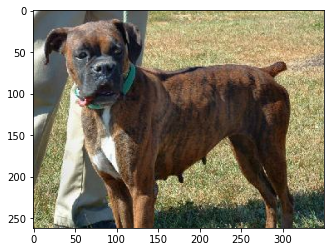

In [23]:
import matplotlib.pyplot as plt

plt.imshow(image_1)

In [24]:
import tensorflow as tf

def normalize_img(image, label):
  return (tf.cast(image, tf.float32) / 255.0, label)

def resize(image, label):
  return (tf.image.resize(image, (224, 224)), label)

In [25]:
train_dataset = train_dataset.map(resize, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

In [26]:
SHUFFLE_VAL = len(train_dataset) // 1000   # Divide by big value on free Colab
BATCH_SIZE = 4   # Use small batch size on free Colab

train_dataset = train_dataset.shuffle(SHUFFLE_VAL)
train_dataset = train_dataset.batch(BATCH_SIZE)

train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

In [27]:
test_dataset = test_dataset.map(resize, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE)

test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

In [28]:
for (img, label) in train_dataset:
  print(img.numpy().shape, label.numpy())
  break

(4, 224, 224, 3) [0 1 0 1]


In [29]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

def AlexNet():
  inp = layers.Input((224, 224, 3))
  x = layers.Conv2D(96, 11, 4, activation='custom_activation')(inp)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(3, 2)(x)
  x = layers.Conv2D(256, 5, 1, activation='custom_activation')(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(3, 2)(x)
  x = layers.Conv2D(384, 3, 1, activation='custom_activation')(x)
  x = layers.Conv2D(384, 3, 1, activation='custom_activation')(x)
  x = layers.Conv2D(256, 3, 1, activation='custom_activation')(x)
  x = layers.MaxPooling2D(3, 2)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(4096, activation='custom_activation')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(4096, activation='custom_activation')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(1, activation='custom_activation')(x)

  model = Model(inputs=inp, outputs=x)

  return model

model = AlexNet()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization_2 (Batc  (None, 54, 54, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 batch_normalization_3 (Batc  (None, 22, 22, 256)      1024

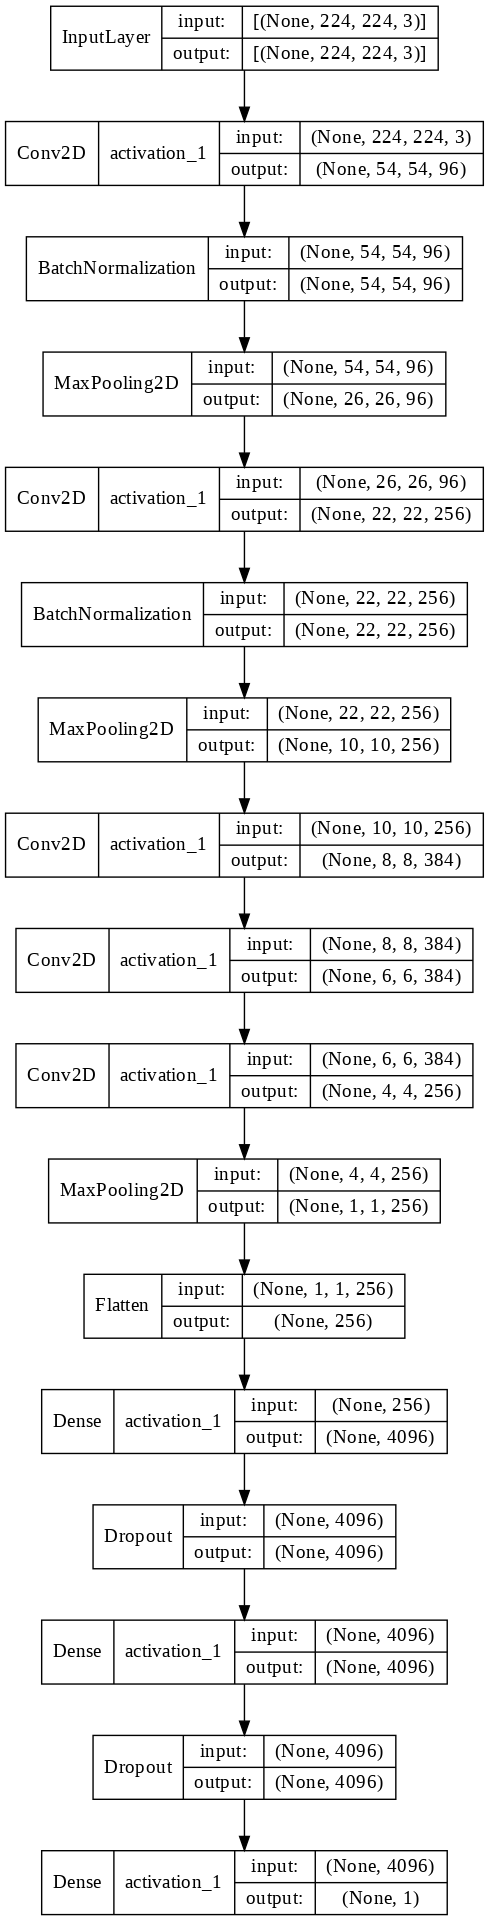

In [30]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    show_layer_activations=True,
    dpi=100
)

In [31]:
for (img, label) in train_dataset:
  print(model(img).numpy().shape, label.numpy())
  break

(4, 1) [0 1 0 0]


In [32]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, 
                   monitor='loss')

In [34]:
model.fit(train_dataset, epochs=25, validation_data=test_dataset,
          callbacks=[es])

Epoch 1/25
4653/4653 [==============================] - 92s 19ms/step - loss: 7.6850 - accuracy: 0.4959 - val_loss: 7.4738 - val_accuracy: 0.5099
Epoch 2/25
4653/4653 [==============================] - 86s 19ms/step - loss: 7.6847 - accuracy: 0.4961 - val_loss: 7.4738 - val_accuracy: 0.5099
Epoch 3/25
4653/4653 [==============================] - 86s 18ms/step - loss: 7.6847 - accuracy: 0.4961 - val_loss: 7.4738 - val_accuracy: 0.5099
Epoch 4/25
4653/4653 [==============================] - 86s 19ms/step - loss: 7.6847 - accuracy: 0.4961 - val_loss: 7.4738 - val_accuracy: 0.5099
Epoch 5/25
4653/4653 [==============================] - 86s 19ms/step - loss: 7.6847 - accuracy: 0.4961 - val_loss: 7.4738 - val_accuracy: 0.5099
Epoch 6/25
4653/4653 [==============================] - 86s 18ms/step - loss: 7.6847 - accuracy: 0.4961 - val_loss: 7.4738 - val_accuracy: 0.5099
Epoch 7/25
4653/4653 [==============================] - 86s 19ms/step - loss: 7.6847 - accuracy: 0.4961 - val_loss: 7.4738 -